## James Griffin 
### Gene EDA 
#### Stat 536 

In [1]:
#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("../data/gene_data.csv", delimiter=' ')

In [14]:
data.shape
data.columns.tolist()

['Malignant',
 '1260_s_at',
 '1909_at',
 '31639_f_at',
 '32041_r_at',
 '32086_at',
 '32179_s_at',
 '32331_at',
 '32783_at',
 '33334_at',
 '33716_at',
 '33921_at',
 '34243_i_at',
 '34818_at',
 '35299_at',
 '35331_at',
 '36311_at',
 '37347_at',
 '37537_at',
 '37639_at',
 '38087_s_at',
 '38263_at',
 '38348_at',
 '38673_s_at',
 '39549_at',
 '40238_at',
 '40888_f_at',
 '41126_at',
 '41181_r_at',
 '41355_at',
 '41584_at',
 '41693_r_at',
 '565_at',
 '837_s_at',
 '877_at',
 '39196_i_at',
 '1574_s_at',
 '38844_at',
 '37794_at',
 '33196_at',
 '39345_at',
 '34474_at',
 '35955_at',
 '40678_at',
 '37418_at',
 '36298_at',
 '31882_at',
 '35182_f_at',
 '38908_s_at',
 '41646_at',
 '34260_at',
 '39427_at',
 '31710_at',
 '32668_at',
 '35368_at',
 '37394_at',
 '32713_at',
 '264_at',
 '1287_at',
 '33264_at',
 '35128_at',
 '39612_at',
 '35654_at',
 '781_at',
 '31711_at',
 '32052_at',
 '33247_at',
 '38141_at',
 '37015_at',
 '41529_g_at',
 '32019_at',
 '41230_at',
 '1023_at',
 '33732_at',
 '31766_s_at',
 '395

In [17]:
data.isnull().sum()
data.head()

,Malignant,1260_s_at,1909_at,31639_f_at,32041_r_at,32086_at,32179_s_at,32331_at,32783_at,33334_at,...,36362_at,1709_g_at,36837_at,38940_at,37141_at,39979_at,34682_at,35635_at,36097_at,31771_at
0,0.013538,2.781613,4.390829,3.353674,2.587266,3.197381,2.495582,3.957500,7.253459,4.080288,...,3.096594,4.830983,3.270169,2.358879,6.300150,6.179502,4.073739,5.392437,9.087284,2.617124
1,0.190408,3.091720,4.679300,4.082109,3.323379,3.564034,2.506098,4.185018,6.963955,3.737206,...,3.751392,4.358207,4.412468,2.422339,3.093921,5.120525,5.205774,5.525375,5.366550,3.163398
2,0.181055,2.836386,4.698752,4.308980,2.887024,3.560608,2.566259,4.229297,6.944378,3.888011,...,3.857687,4.380085,4.192691,2.584036,3.064807,5.293856,4.868696,5.294992,5.990795,3.330722
3,0.027590,3.376892,4.754921,3.583298,3.389157,3.510007,2.559978,4.078641,6.932522,3.678257,...,4.091175,4.467538,4.024866,2.574266,3.599903,5.198681,5.235519,5.126429,6.060436,3.179971
4,0.038723,2.898819,4.723345,3.926955,2.803978,3.327991,2.661620,3.878328,6.927675,3.842573,...,3.919391,4.373989,4.469515,2.617985,2.837357,5.369670,4.967915,5.169273,6.196087,3.001127


Ok so we have a few problems, I don't really understand what any of these columns mean. through googling the names of a few of them, I know that they are genes / genomes in the boy, however I do not know what any of them mean, which makes things challenging just to approach the problem from a conceptual stand point. A data dictionary would be incredibly helpful. 

Also we have the problem that we have far more features than columns. So when we go to do linear techniques, the (X'X)^(-1) doesn't exist, and that's before we even look at things like the colinearity and possible cereal correlation, all that good ol stuff. 

So looking at the quesitons from the homework, the goal of the analysis is to 
1. What genes do you find have the strongest association with malignancy? 
2. How well do the identified genes explain the malignancy rating?

Looking at the EDA homework, we need to 
For each question being asked, provide at least 1 summary statistic or graphic that helps you start to answer the question. 
Also, provide a 2-3 sentence description of what you learn about the question from your EDA.

Ok so looking at question 1, - which genes do you find the strongest association with mnalignancy, I am trying to think of how to do this without doing PCA, like we know the curse of dimentinality is such that things in high dimentions are actualyl arbitaritly far away.

For example, "if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? Well, the average distance, believe it or not, will be about 408.25." (Source: Hands on Machine Learning p.207)

Thus, in high dimensions, things become very sparse and observations have a higher chance of being far away from eachother. This also applies to our test set or future predictions and thus training points are less likely to generalize to new data points (aka overfitting).

I think the only way to proceed is to look at PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
X = data.drop(columns = ['Malignant'])
y = data.Malignant

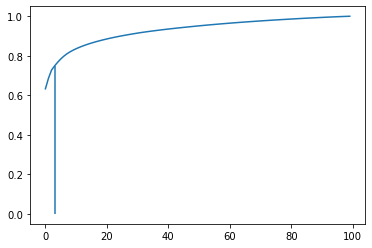

In [31]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[3],x=3)

We can see from above how our explained ratio increases to 100 percent as we continue to add principal components. We also see an elbow in our graph between about 3 and 5 components. Thus, one option would be to use 20 components when reducing the dimensionality since the marginal benefit for each componenet after that in terms of varience gained is pretty small. Another option would be to use the number of components necessary to reach a certain amount of explained variance. For example, we could calculate how many components we would need to explain at least 95% of the variance:

In [21]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

50
0.9510330611136736


Thus - we would need 51 components (50 + 1 since start from 0) to explain 95.10% of the variance in our data. 

So that is my answer to question 1, that's how I would go about doing the initial, "find what components are highly correlated with malignancy" 

### question 2: 
How well do the identified genes explain the malignancy rating?

In [46]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cum_ratio)

[0.6326816  0.68627338 0.72761944 0.74863859]


In [47]:
print(X_pca.shape)
print(len(y))

(102, 4)
102


In [48]:
#ok so I'll just throw this in the good fashioned OLS to see what we get 
import statsmodels.api as sm

In [49]:
reg_obj = sm.OLS(y ,X_pca)

results = reg_obj.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:              Malignant   R-squared (uncentered):                   0.227
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              7.201
Date:                Sat, 23 Jan 2021   Prob (F-statistic):                    3.99e-05
Time:                        17:43:48   Log-Likelihood:                         -91.613
No. Observations:                 102   AIC:                                      191.2
Df Residuals:                      98   BIC:                                      201.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This shows that the relationships between the principal compoments and the malignancy of a tumor / gene, not exactly sure, is not linear, which is rather obvious, If I were to continue with this homework analysis my next step would be to introduce non linear boosting methods, with possible cost functions. and then if that didn't work, I would go to a deep learning layered network through pytorch. 

That is my answer to question 2